# Machine Learning Algorithms - Playing with Data #



## Titanic: Machine Learning from Disaster ##

There are lots of datasets available to play with. I am chosing a widely used Titanic Dataset.

<img src="https://www.pixelstalk.net/wp-content/uploads/images1/Titanic-Wallpapers-HD.jpg"/>


## Problem Definition ##

The sinking of the Titanic is one of the most infamous shipwrecks in history. On **April 15, 1912**, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing **1502** out of **2224** passengers and crew. 

The Titanic Dataset is a very good dataset for begineers to start a journey in data science.

The dataset contains the following features or variables - 
PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

The goal is to predict if a passenger survived the sinking of the Titanic or not. For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

## Predict survival on the Titanic ##

We will follow the steps-
    1. Exploratory Data Analysis(EDA)
        1.1. Data Collection
        1.2. Data Visualization
        1.3. Data Pre-Processing
    3. Model Training
    4. Model Evaluation
    5. Performance Evaluation

Please note that we will be heavily dependent on the Python libraries - **Pandas**, **Numpy**, **Matplotlib** and **Seaborn**. If you need a basic idea, you can refer the videos from [Simplilearn](https://www.youtube.com/results?search_query=pandas+numpy+matplotlib+scipy+simplilearn). 

## Import ##

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # setting seaborn default for plots
%matplotlib inline

## Version ##

In [2]:
print('Python: {}'.format(sys.version))
print('numpy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(sns.__version__))

Python: 3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)]
numpy: 1.16.3
pandas: 0.24.2
matplotlib: 3.1.0
seaborn: 0.9.0


## 1. Exploratory Data Analysis(EDA) ##

## 1.1 Data Collection ##

The training data set and testing data set are added in the data folder, or you can download directly from [Kaggle](https://www.kaggle.com/c/titanic/data)

In [3]:
#Import train and test to play with it
df_train = pd.read_csv('data/train_titanic.csv')
df_test = pd.read_csv('data/test_titanic.csv')

###  1.1.1 Quick exploration ###

In [4]:
#After loading the data via pandas, we should checkout what the content is, description and via the following:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.1.2 Indexing ###

In [8]:
df_train.iloc[3]

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                      35
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object

In [9]:
df_train['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

### 1.1.3 Selections ###

In [10]:
df_train[df_train["Age"]>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [11]:
df_train[(df_train["Age"]==11)&(df_train["SibSp"]==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S


### 1.1.4 Distinct Elements ###

In [12]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### 1.1.5 Basic Stats ###

In [13]:
#Remember: You need print function for multiple output
print(df_train['Age'].mean())
print(df_train['Fare'].median())
print((df_train['Sex'] == 'female').sum())

29.69911764705882
14.4542
314


### 1.1.6 Missing Data ###

In [14]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#If you want to remove all the null value, you can uncomment this line
#df_train = df_train.dropna()

#But that will decrease the size of the dataset, so instead we can substitute the values with the mean value of Age
df_train['Title'] = df_train.Name.apply(lambda x: x.split(' ')[1])
df_train['Age'].fillna(df_train.groupby("Title")["Age"].transform("median"), inplace=True)
df_test['Title'] = df_test.Name.apply(lambda x: x.split(' ')[1])
df_test['Age'].fillna(df_test.groupby("Title")["Age"].transform("median"), inplace=True)

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [17]:
df_train['Age'].fillna(30, inplace=True)
df_train.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

### 1.1.7 Groupby ###

In [18]:
#Find average age of passengers that survived vs. died
df_train.groupby('Survived')['Age'].mean()

Survived
0    30.214936
1    28.031199
Name: Age, dtype: float64

In [19]:
df_train.groupby(['Sex', 'Survived'])['PassengerId'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

### 1.1.8 Pivot Tables ###

In [20]:
df_train.pivot_table(index='Sex', columns='Parch', values='Survived', aggfunc='sum')

Parch,0,1,2,3,4,5,6
Sex,,,,,,,
female,153.0,46.0,30.0,3.0,0.0,1.0,0.0
male,80.0,19.0,10.0,0.0,0.0,0.0,NaN


In [21]:
df_train.pivot_table(index='Sex', columns='SibSp', values='Survived', aggfunc='sum')

SibSp,0,1,2,3,4,5,8
Sex,,,,,,,
female,137,80,10,4,2,0,0
male,73,32,3,0,1,0,0


Now we have a general idea of the data set contents.

## 1.2. Data Visualization ##

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data. 

It contributes to better decision making with visual analytics.

### 1.2.1. Scatter plot ###

Scatter plot helps in identifying the type of relationship(if any) between two quantitative variables


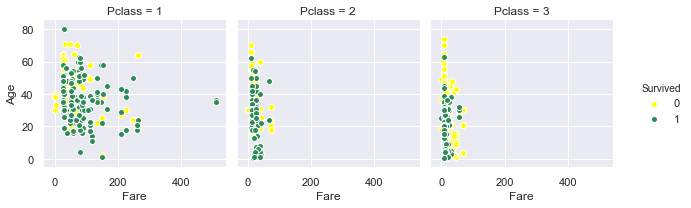

In [22]:
# Modify the graph above by assigning each species an individual color.
graph = sns.FacetGrid(df_train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"yellow"})
graph = graph.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

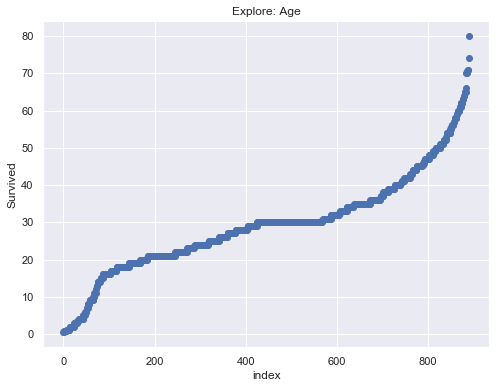

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_train.shape[0]), np.sort(df_train['Age'].values))
plt.xlabel('index')
plt.ylabel('Survived')
plt.title('Explore: Age')
plt.show()

### 1.2.2. Box plot ###

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

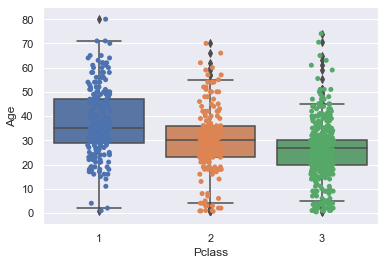

In [24]:
ax= sns.boxplot(x="Pclass", y="Age", data=df_train)
ax= sns.stripplot(x="Pclass", y="Age", data=df_train, jitter=True, edgecolor="gray")
plt.show()

### 1.2.3. Histogram ###

We can also create a histogram of each input variable to get an idea of the distribution.

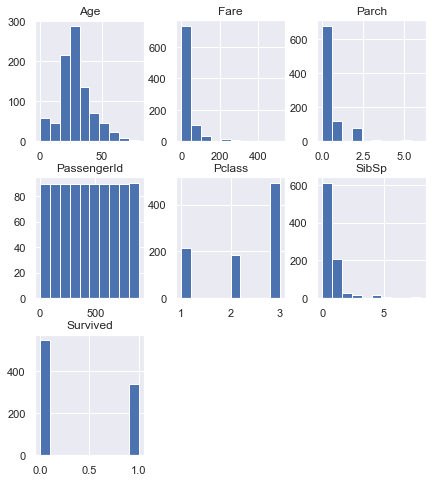

<Figure size 432x288 with 0 Axes>

In [25]:
df_train.hist(figsize=(7,8));
plt.figure();

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

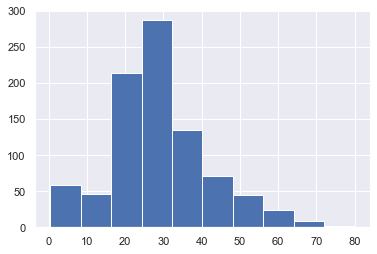

In [26]:
df_train["Age"].hist()

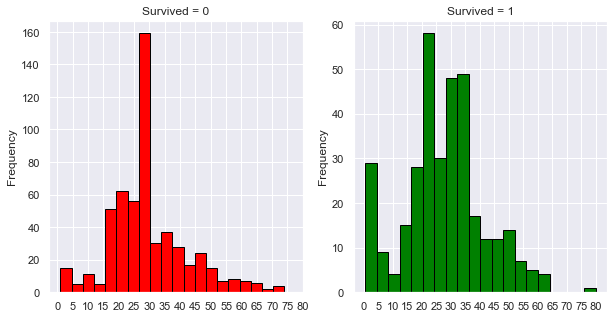

In [27]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

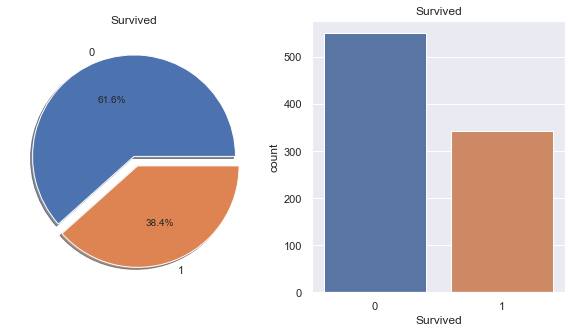

In [28]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

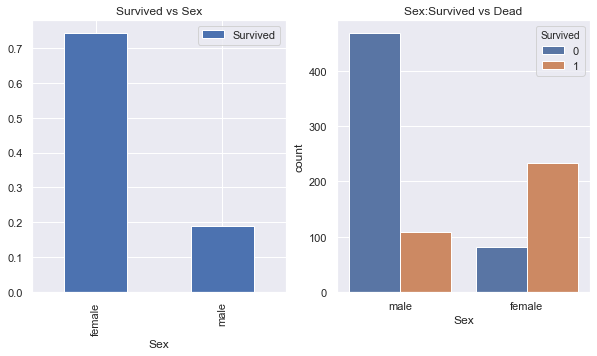

In [29]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

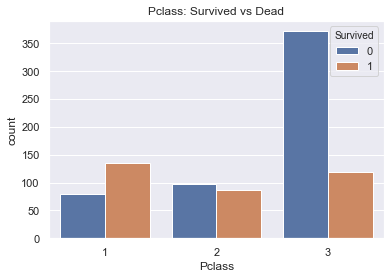

In [30]:
sns.countplot('Pclass', hue='Survived', data=df_train)
plt.title('Pclass: Survived vs Dead')
plt.show()

### 1.2.4. Multivariate Plot ###

Now we can look at the interactions between the variables. First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

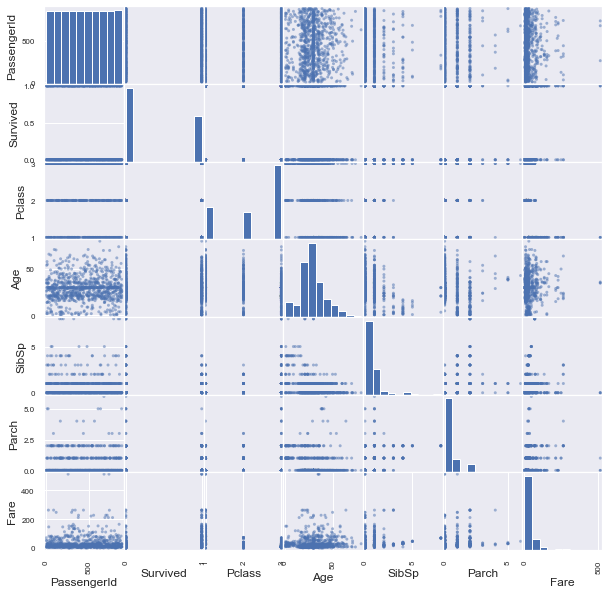

<Figure size 432x288 with 0 Axes>

In [31]:
pd.plotting.scatter_matrix(df_train,figsize=(10,10))
plt.figure();

### 1.2.5. Violin plot ###

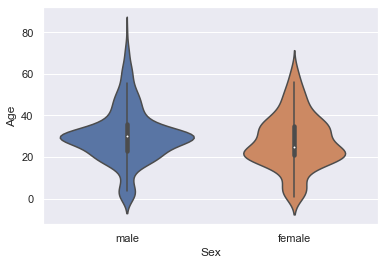

In [32]:
sns.violinplot(data=df_train,x="Sex", y="Age")

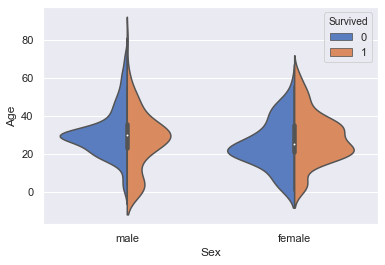

In [33]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, palette="muted", split=True)

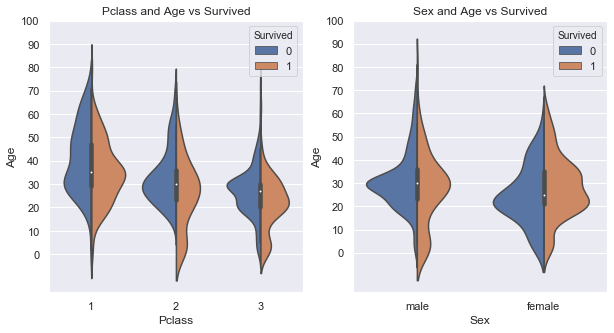

In [34]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### 1.2.6. Pair plot ###

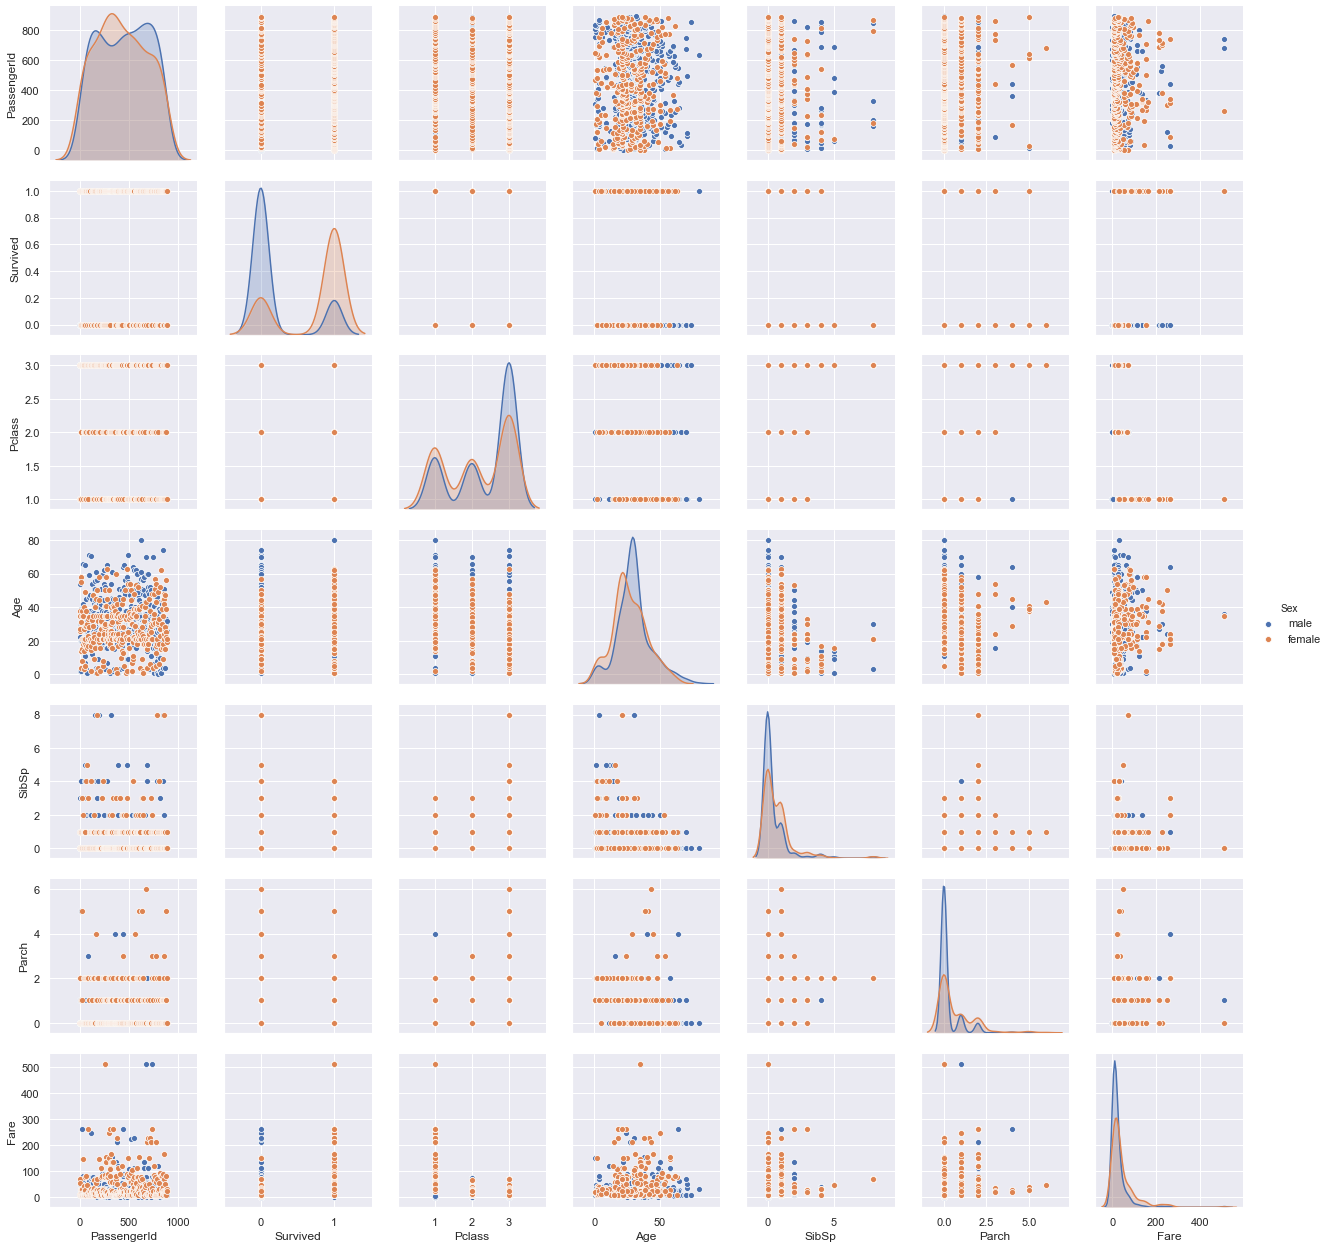

In [35]:
sns.pairplot(df_train, hue="Sex");

### 1.2.7. kdeplot ###

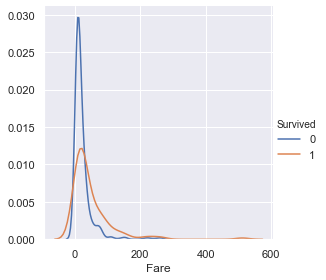

In [36]:
sns.FacetGrid(df_train, hue="Survived", height=4).map(sns.kdeplot, "Fare").add_legend()
plt.show();

### 1.2.8. Joint plot ###

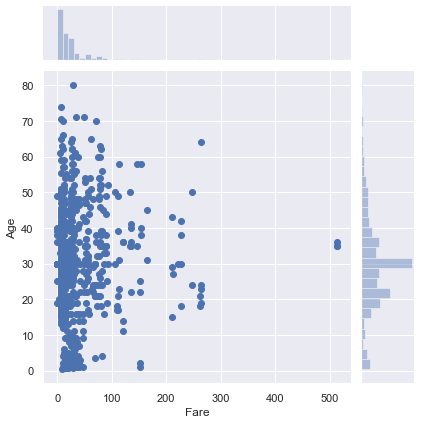

In [37]:
sns.jointplot(x='Fare',y='Age',data=df_train);

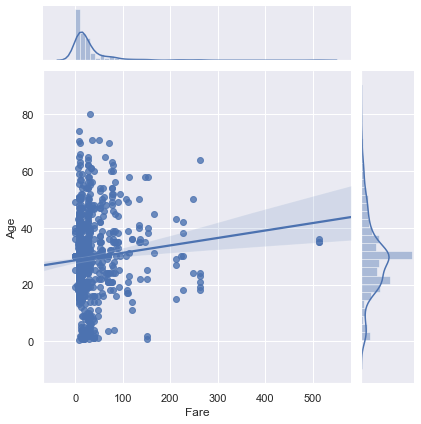

In [38]:
sns.jointplot(x='Fare',y='Age' ,data=df_train, kind='reg');

### 1.2.9. Swarm plot ###

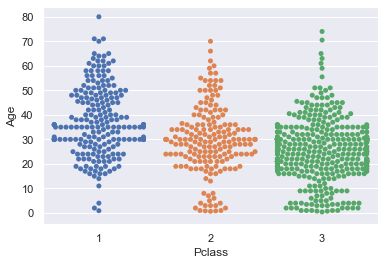

In [39]:
sns.swarmplot(x='Pclass',y='Age',data=df_train);

### 1.2.10. Heatmap ###

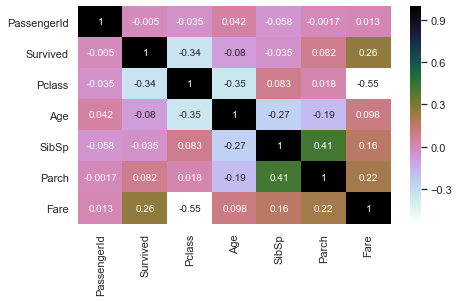

In [40]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df_train.corr(),annot=True,cmap='cubehelix_r') 
plt.show();

### 1.2.11. Bar plot ###

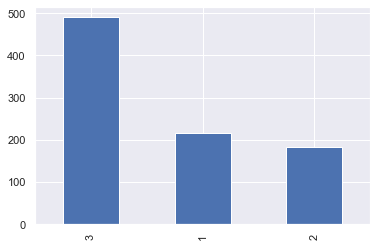

In [41]:
df_train['Pclass'].value_counts().plot(kind="bar");

### 1.2.12. Factorplot ###

e:\python\mpy\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


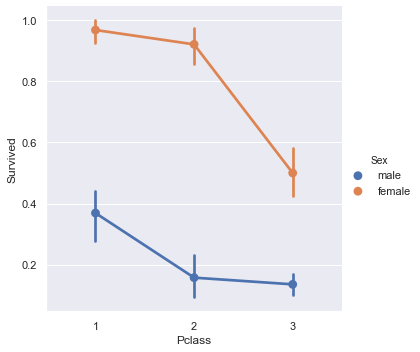

In [42]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
plt.show();

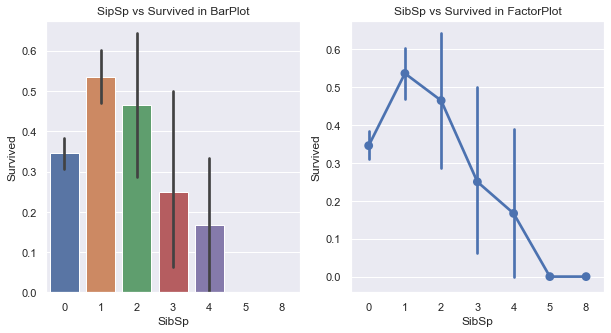

In [43]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.barplot('SibSp','Survived', data=df_train,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sns.factorplot('SibSp','Survived', data=df_train,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show();

### 1.2.13 distplot ###

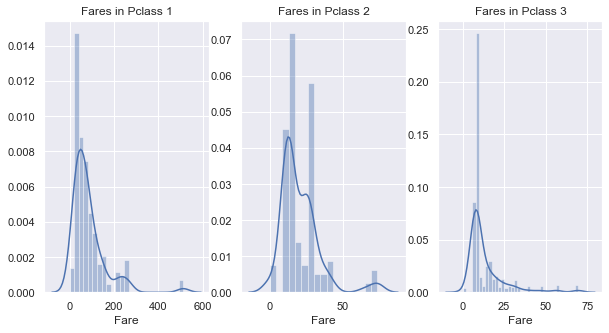

In [44]:
f,ax=plt.subplots(1,3,figsize=(10,5))
sns.distplot(df_train[df_train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df_train[df_train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df_train[df_train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

## 1.3. Data Pre-Processing ##

Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis. There are plenty of steps for data preprocessing and we just listed some of them :

    * Removing Target column (id)
    * Sampling (without replacement)
    * Dealing with Imbalanced Data
    * Introducing missing values and treating them (replacing by average values)
    * Noise filtering
    * Data discretization
    * Normalization and standardization
    * PCA analysis
    * Feature selection (filter, embedded, wrapper)

In [45]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


### Variables ###

* Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* Sibsp defines family relations in the following manner:
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch defines family relations in the following manner:
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.
* Pclass is a proxy for socio-economic status (SES):
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower
* Embarked is a nominal datatype
* Name is a nominal datatype . It could be used in feature engineering to derive the gender from title
* Sex is a nominal datatype
* Ticket has no impact on the outcome variable. Thus, they will be excluded from analysis
* Cabin is a nominal datatype that can be used in feature engineering
* Fare indicates the fare
* PassengerID has no impact on the outcome variable. Thus, it will be excluded from analysis
* Survival is our dependent variable - 0 or 1

### Types of Features ###


* **Categorical**: A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. for example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

    Categorical Features in the dataset: **Sex,Embarked**


* **Ordinal**: An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

    Ordinal Features in the dataset: **PClass**


* **Continous**: A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

    Continous Features in the dataset: **Age**

We will simplify the following data -

* Sex
* Age
* Cabin
* Fare
* Title
* Embark

In [46]:
def simplify_sex(df):
    sex_mapping = {"male": 0, "female": 1}
    df.Sex = df.Sex.map(sex_mapping)
    return df

def simplify_age(df):
    #bins = (-1, 12, 18, 35, 60, 120)
    #group_names = [0,1,2,3,4]
    #categories = pd.cut(df.Age, bins, labels=group_names)
    #df.Age = categories
    
    df.loc[ df['Age'] <= 16, 'Age'] = 0,
    df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 1,
    df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 2,
    df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 3,
    df.loc[ df['Age'] > 62, 'Age'] = 4
    return df

def simplify_cabin(df):
    #df.Cabin = df.Cabin.apply(lambda x: x[0])
    #df['Cabin'].fillna(df.groupby('Pclass')['Cabin'].transform("median"), inplace=True)
    df['Cabin'] = df['Cabin'].str[:1]   
    cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
    df['Cabin'] = df['Cabin'].map(cabin_mapping)
    df['Cabin'].fillna(df.groupby('Pclass')['Cabin'].transform("median"), inplace=True)
    return df

def simplify_fare(df):
    df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform("median"), inplace=True)
    #bins = (-1, 0, 8, 15, 31, 1000)
    #group_names = [0, 1, 2, 3, 4]
    #categories = pd.cut(df.Fare, bins, labels=group_names)
    #df.Fare = categories
    
    df.loc[ df['Fare'] <= 17, 'Fare'] = 0,
    df.loc[(df['Fare'] > 17) & (df['Fare'] <= 30), 'Fare'] = 1,
    df.loc[(df['Fare'] > 30) & (df['Fare'] <= 100), 'Fare'] = 2,
    df.loc[ df['Fare'] > 100, 'Fare'] = 3
    return df

def format_title(df):
    df['Title'] = df['Title'].str.extract(' ([A-Za-z]+)\.', expand=False)
    title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 0, "Dr": 0, "Rev": 0, "Col": 0, "Major": 0, "Mlle": 2,"Countess": 2,
                 "Ms": 2, "Lady": 1, "Jonkheer": 0, "Don": 0, "Dona" : 2, "Mme": 2,"Capt": 0,"Sir": 0 }
    df['Title'] = df['Title'].map(title_mapping)
    return df

def simplify_embark(df):
    df['Embarked'].fillna("S", inplace=True)
    embarked_mapping = {"S": 0, "C": 1, "Q": 2}
    df['Embarked'] = df['Embarked'].map(embarked_mapping)
    return df
    
def drop_features(df):
    df = df.drop(['Ticket', 'Name'], axis=1)
    return df

def transform_features(df):
    df = simplify_sex(df)
    df = simplify_age(df)
    df = simplify_cabin(df)
    df = simplify_fare(df)
    df = format_title(df)
    df = simplify_embark(df)
    df = drop_features(df)
    return df

In [47]:
df_train = transform_features(df_train)
df_test = transform_features(df_test)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,0.0,2.0,0,NaN
1,2,1,1,1,3.0,1,0,2.0,0.8,1,NaN
2,3,1,3,1,1.0,0,0,0.0,2.0,0,NaN
3,4,1,1,1,2.0,1,0,2.0,0.8,0,NaN
4,5,0,3,0,2.0,0,0,0.0,2.0,0,NaN


In [48]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Title          891
dtype: int64

In [49]:
df_train = df_train.drop(['Title'], axis=1)
df_test = df_test.drop(['Title'], axis=1)

In [50]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,1.0,1,0,0.0,2.0,0
1,2,1,1,1,3.0,1,0,2.0,0.8,1
2,3,1,3,1,1.0,0,0,0.0,2.0,0
3,4,1,1,1,2.0,1,0,2.0,0.8,0
4,5,0,3,0,2.0,0,0,0.0,2.0,0


In [51]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,2.0,0,0,0.0,2.0,2
1,893,3,1,3.0,1,0,0.0,2.0,0
2,894,2,0,3.0,0,0,0.0,2.0,2
3,895,3,0,2.0,0,0,0.0,2.0,0
4,896,3,1,1.0,1,1,0.0,2.0,0


### Feature Encoding ###

This step is not needed here. Just mentioning the process.
In machine learning projects, one important part is feature engineering. It is very common to see categorical features in a dataset. However, our machine learning algorithm can only read numerical values. It is essential to encoding categorical features into numerical values.

* Encode labels with value between 0 and n_classes-1
* LabelEncoder can be used to normalize labels.
* It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
dtypes: float64(3), int64(7)
memory usage: 69.7 KB


## 3. Model Training & Evaluation ##

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [55]:
y_train = df_train['Survived']
X_train = df_train.drop(['PassengerId', 'Survived'], axis=1)

In [56]:
X_test = df_test

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(891, 8)
(891,)
(418, 9)


### 3.1. Cross Validation (K-fold) ###

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 3.2. kNN ###

In [59]:
clf = KNeighborsClassifier(n_neighbors = 13, metric='euclidean')
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.80898876 0.84269663 0.80898876 0.80898876 0.79775281
 0.83146067 0.78651685 0.76404494 0.83146067]


In [60]:
# kNN Score
round(np.mean(score)*100, 2)

80.81

### 3.3. Decision Tree ###

In [61]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.78651685 0.73033708 0.7752809  0.86516854 0.76404494
 0.83146067 0.79775281 0.71910112 0.78651685]


In [62]:
# decision tree Score
round(np.mean(score)*100, 2)

78.67

### 3.4 Random Forest ###

In [63]:
clf = RandomForestClassifier(n_estimators=13)
score = cross_val_score(clf,  X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.80898876 0.79775281 0.75280899 0.85393258 0.79775281
 0.85393258 0.79775281 0.74157303 0.84269663]


In [64]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.36

### 3.5. Naive Bayes ###

In [65]:
clf = GaussianNB()
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.73033708 0.74157303 0.69662921 0.69662921 0.7752809
 0.71910112 0.78651685 0.84269663 0.79775281]


In [66]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

76.2

### 3.6. SVM ###

In [67]:
svc = SVC()
score = cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

e:\python\mpy\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\python\mpy\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\python\mpy\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\python\mpy\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change f

[0.81111111 0.78651685 0.82022472 0.82022472 0.85393258 0.79775281
 0.83146067 0.83146067 0.80898876 0.85393258]


e:\python\mpy\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [68]:
round(np.mean(score)*100,2)

82.16

### 3.7. Logistic Regression ###

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_score = cross_val_score(logreg, X_train, y_train, scoring=scoring)
print(logreg_score)

[0.7979798  0.79124579 0.8013468 ]


e:\python\mpy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\python\mpy\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
e:\python\mpy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\python\mpy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\python\mpy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warn

In [70]:
round(np.mean(logreg_score)*100,2)

79.69

### 3.8 XGBoost ###

In [71]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
score = cross_val_score(xgboost, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.83146067 0.79775281 0.80898876 0.80898876 0.80898876
 0.82022472 0.79775281 0.76404494 0.80898876]


In [72]:
round(np.mean(score)*100,2)

80.92

There are several other algorithms we can try as well. The score can also be improved by tuning the hyperparameters. But for the time being let us evaluate the performance ofour model


## 4. Performance Evaluation ##

In [73]:
df_test['Age'].fillna(30, inplace=True)
X_test  = df_test.drop("PassengerId",axis=1)

In [74]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,2.0,0,0,0.0,2.0,2
1,3,1,3.0,1,0,0.0,2.0,0
2,2,0,3.0,0,0,0.0,2.0,2
3,3,0,2.0,0,0,0.0,2.0,0
4,3,1,1.0,1,1,0.0,2.0,0


In [75]:
xgboost = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
Y_pred_xgboost = xgboost.predict(X_test)

print("Prediction using XGBoost: ", Y_pred_xgboost)


Prediction using XGBoost:  [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 1 1 1 1 0 1 0 0 1]


In [76]:
X_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [77]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_svc = svc.predict(X_test)

print("Prediction using SVM: ", Y_pred_svc)

Prediction using SVM:  [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


e:\python\mpy\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [78]:
prediction = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived_XGBoost": Y_pred_xgboost,
        "Survived_SVM": Y_pred_svc
    })

prediction.head(10)

,PassengerId,Survived_XGBoost,Survived_SVM
0,892,0,0
1,893,0,1
2,894,0,0
3,895,0,0
4,896,0,1
5,897,0,0
6,898,1,1
7,899,0,0
8,900,1,1
9,901,0,0
